In [1]:
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
import matplotlib.pyplot as plt

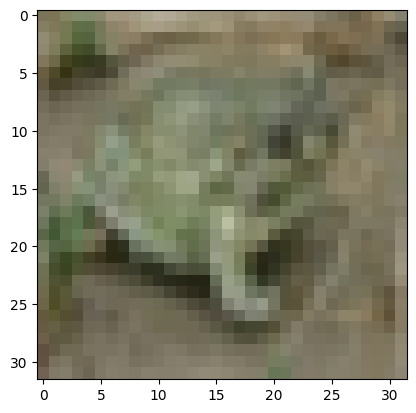

In [8]:
image = x_train[452]
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

<ipython-input-9-80a352cb0c16>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


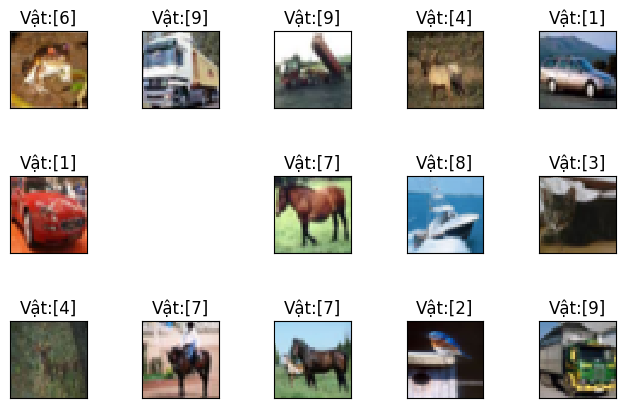

In [9]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap = 'gray',
             interpolation = 'none')
  plt.title('Vật:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [10]:
from keras import models
from keras.layers import Dense

In [11]:
from keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
from keras.layers.serialization import activation
model.add(Dense(2048, activation = 'relu',input_shape = (32*32*3,)))
model.add(Dense(1400, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_2 (Dense)             (None, 512)               717312    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 9,884,546
Trainable params: 9,884,546
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

In [15]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [16]:
from keras.utils import to_categorical #ONE HOT ENCODING

In [17]:
y_train = to_categorical(y_train,10)

In [18]:
y_test = to_categorical(y_test,10)

In [19]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs = 10, batch_size = 128)

Epoch 1/10
391/391 [==============================] - 9s 7ms/step - loss: 2.1831 - accuracy: 0.2538
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.8019 - accuracy: 0.3502
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6980 - accuracy: 0.3908
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6255 - accuracy: 0.4191
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.5696 - accuracy: 0.4399
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5233 - accuracy: 0.4549
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.4804 - accuracy: 0.4726
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 1.4398 - accuracy: 0.4836
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 1.4068 - accuracy: 0.4952
Epoch 10/10
391/391 [==============================] - 2s 5ms/step - loss: 1.3694 - accuracy: 0.5109

In [21]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7341 - accuracy: 0.4061


In [22]:
print('Ham mat mat tren tap kiem tra: ',test_loss)
print('Do chinh xac tren tap kiem tra: ',test_acc*100,'%')

Ham mat mat tren tap kiem tra:  1.7340697050094604
Do chinh xac tren tap kiem tra:  40.61000049114227 %


In [23]:
model.save('model_cifar10_1.h5')

In [24]:
from keras.saving.legacy.save import load_model
model11 = load_model('model_cifar10_1.h5')

In [25]:
from keras.utils import load_img
import cv2 as cv
import numpy as np

In [26]:
model11.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[6.23705611e-02, 1.39900908e-01, 8.54270607e-02, ...,
        3.86279374e-02, 9.32483673e-02, 7.06004277e-02],
       [7.95946829e-03, 2.23789185e-01, 6.35578588e-04, ...,
        3.50010887e-05, 1.32744359e-02, 7.54290164e-01],
       [2.10511595e-01, 3.06011379e-01, 5.56557323e-04, ...,
        9.81167238e-03, 1.11763068e-01, 3.61076593e-01],
       ...,
       [1.81163382e-02, 7.79380556e-04, 1.13999404e-01, ...,
        1.29605100e-01, 3.21204914e-03, 3.21003865e-03],
       [7.33569413e-02, 1.05227321e-01, 8.98415670e-02, ...,
        2.55086839e-01, 2.76626758e-02, 5.89748956e-02],
       [2.75799353e-02, 1.85674764e-02, 1.74599327e-02, ...,
        9.01971400e-01, 5.73498954e-04, 3.76414484e-03]], dtype=float32)

In [27]:
from keras.utils.image_utils import img_to_array

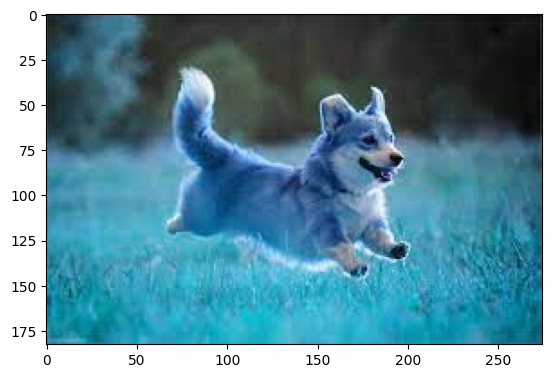

In [28]:
url = 'dog_test.jpg'
test_img = cv.imread(url)
plt.imshow(test_img)

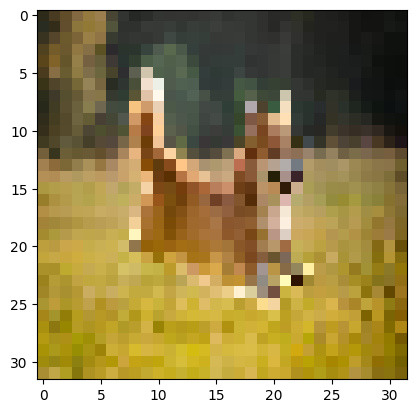

In [29]:
img = load_img(url,color_mode = 'rgb',target_size=(32,32))
plt.imshow(img)

In [30]:
img = img_to_array(img)

In [31]:
img.size

3072

In [32]:
img = img.reshape(1,32*32*3)

In [33]:
img = img.astype('float32')

In [34]:
img = img/255

In [40]:
np.argmax(model11.predict(img),axis=1)

1/1 [==============================] - 0s 38ms/step


array([7])